# Section 1: Business Understanding

This project uses AirBnB Dataset that contains the following files: 

calendar.csv
listings.csv
reviews.csv

The AirBnB dataset contains the AirBnB listing, reviews and calendar/frequency of travel to the city of Seattle. The data can be used to find out trend information related to travel to Seattle for various months. It can also be used to find out about pricing and reviews related to the listings. 

Below are some of the questions asked for the data analysis of this project. 

# Question 1:

1) Are there any price spikes for peak months? 

# Question 2:

2) What are the most frequented neighborhoods in Seattle?

# Question 3:

3) Can we predict the price using number_of_reviews and review_score_rating?



#Note: For each of the questions, there are separate Data Preparation and Data Modeling/Data Visualization steps as labeled.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_curve,roc_auc_score
import AirBnB as ab

# Section 2: Data Understanding - All Questions

## Gather - 3 files

In [71]:
#Get the airbnb data and look at the first 5 lines: calendar.csv, listings.csv, reviews.csv

file_path="./calendar.csv"
fpath="./"
fname="temp_output.csv"

calendar_df=ab.read_file(file_path) 
five_lines=ab.get_five_lines(calendar_df)
print(five_lines)


   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [74]:
file_path="./listings.csv"
listings_df=ab.read_file(file_path) 
five_lines=ab.get_five_lines(listings_df)
print(five_lines)

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [75]:
file_path="./reviews.csv"
reviews_df=ab.read_file(file_path) 
five_lines=ab.get_five_lines(reviews_df)
print(five_lines)

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  


In [36]:
# Get the columns and row counts of each of the files
calendar_df.head()
calendar_df.shape

(1393570, 4)

In [37]:
# Get the columns and row counts of each of the files
listings_df.head()
listings_df.shape

(3818, 92)

In [38]:
# Get the columns and row counts of each of the files
reviews_df.head()
reviews_df.shape

(84849, 6)

# Section 3.1: Data Preparation - Question 1
##  Are there any price spikes for peak months?

In [39]:
#Checking for missing data in calendar.csv

ab.get_no_missing_cols(calendar_df)

{'available', 'date', 'listing_id'}

In [40]:
#Getting the shape
calendar_df.shape

(1393570, 4)

In [41]:
# From the timestamp, get month, and year values. 

calendar_df['year'] = pd.DatetimeIndex(calendar_df['date']).year
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
calendar_df.head()
pd.unique(calendar_df['month'])
calendar_df['month'].value_counts()
calendar_df['month'].value_counts().sort_values(ascending=False)

3     118358
5     118358
7     118358
8     118358
10    118358
12    118358
1     114540
4     114540
6     114540
9     114540
11    114540
2     110722
Name: month, dtype: int64

In [42]:
# Checking for missing data and data types
calendar_df.isnull().mean()
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
year           int64
month          int64
dtype: object

In [43]:
#Checking for the busiest months missing data - inline with main months, decide to drop na
categories=[12,10,8,7,5,3]
busiest_df=calendar_df[calendar_df['month'].isin(categories)]
busiest_df['price'].isnull().mean()

0.31848431594540855

In [44]:
# Putting price into float to be able to process further
calendar_df['price'] = calendar_df['price'].str.replace(',','').str.replace('$','').astype('float')

In [76]:
# drop na - Reason: we have 1393570 records. The peak months missing data is 32% inline with other non-peak months missing data. Dropping is a good option here.  
calendar_df.dropna(inplace=True)


# Section 4.1: Data Calculation, Visualization - Question 1
##  Are there any price spikes for peak months?

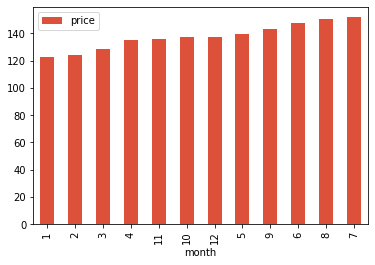

In [46]:
#Getting the mean price and sort values
price_df=calendar_df.groupby(["month"]).price.mean().to_frame()

price_df=price_df.sort_values(by='price')

#Plotting the whole thing
color = cm.inferno_r(np.linspace(.4, .8, 12))

price_df.plot(kind='bar', stacked=True, color=color)

In [47]:
# Creating peak months and non-peak months and calculate the price spikes
busiest_df=price_df.loc[[12,10,8,7,5,3],:]

non_busiest_df=price_df.loc[[11,9,6,4,2,1],:]

avg_low=non_busiest_df['price'].sum()/6

print(avg_low)

busiest_df['spike']=(busiest_df['price']-avg_low)/avg_low

busiest_df


134.78682203437413


,price,spike
month,,
12,137.251835,0.018288
10,137.031939,0.016657
8,150.656594,0.117740
7,152.094150,0.128405
5,139.538183,0.035251
3,128.644488,-0.045571


# Section 6.1 - Conclusion - Question 1

## 1) Are there any price spikes for peak months?

It turns out that only August (11.77% over mean) and July (12.84% over mean) are the peak months that showed significant spikes in prices. Other peak months such as December, October, March, and May had prices that were close to the mean.

It’s essential to process missing data for this dataset. There was 32% data missing from price column. However, it’s inline with total missing data from dataset. Since we have a lot of data, it was easy to decide to just drop the data.

# Section 3.2 - Data Preparation, Data Visualization - Question 2
## 2) What are the most frequented neighborhoods in Seattle?

In [48]:
# Taking the first file listings.csv and asking the following questions:

columns=['id','neighbourhood_group_cleansed']
listings_df.shape
new_df=listings_df[columns]

listings_df['neighbourhood_group_cleansed'].isnull().mean()

neighbourhood_listing_df=new_df.groupby(['neighbourhood_group_cleansed']).id.count().to_frame()

neighbourhood_listing_df.sort_values(by='id',ascending=False)

,id
neighbourhood_group_cleansed,
Other neighborhoods,794
Capitol Hill,567
Downtown,530
Central Area,369
Queen Anne,295
Ballard,230
West Seattle,203
Rainier Valley,159
University District,122


# Section 6.2 - Conclusion - Question 2

## 2) What are the most frequented neighborhoods in Seattle?

It’s essential to process missing data for this dataset. There was 32% data missing from price column. However, it’s inline with total missing data from dataset. Since we have a lot of data, it was easy to decide to just drop the data.

# Section 3.3 - Data Preparation - Question 3
## 3) Can we predict the price using number_of_reviews and review_score_rating?

In [49]:
# Use these columns [number_of_reviews, review_score_rating, price]
# Putting price into float to be able to process further
listings_df['price'] = listings_df['price'].str.replace(',','').str.replace('$','').astype('float')

In [50]:
#Checking for missing data
print(ab.check_cols_null(listings_df,'price'))

0.0


In [51]:
print(ab.check_cols_null(listings_df,'number_of_reviews'))


0.0


In [52]:
print(ab.check_cols_null(listings_df,'review_scores_rating'))

0.16946045049764275


In [53]:
listings_df.isnull().values.any()

True

In [54]:
# Getting the listing columns and figuring out to drop review_scores_rating null data since it's under 20% missing. 
columns=['price','number_of_reviews','review_scores_rating']
listing_price_df=listings_df[columns]
listing_price_df.shape
listing_price_df.head()

#Decide to drop na for review score rating
listing_price_df=listing_price_df.dropna(subset=['review_scores_rating'])
listing_price_df.shape

(3171, 3)

# Section 4.3 - Data Modeling - Question 3
## Can we predict the price using number_of_reviews and review_score_rating?

In [55]:
# Running Linear Model
listing_price_cols = ['number_of_reviews', 'review_scores_rating']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df, 'price', listing_price_cols, dummy_na=False)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.019743085600305355 on 952 values.'

In [56]:
# Running Linear Model
listing_price_cols = ['number_of_reviews', 'review_scores_rating']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df, 'price', listing_price_cols, dummy_na=True)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was -1.1389076692493109e+28 on 952 values.'

# Very small R-squared scores for both of the variables. Trying another way of splitting number_of_reviews and review_score_ratings into bins instead. 

In [57]:
#How about we split the review_scores_ratings and number of reviews into bins instead and see if processed as categorical variables, the linear model will fit better? 

listing_price_df['review_scores_rating']=listing_price_df['review_scores_rating'].astype('float')
listing_price_df.head()
listing_price_df['review_scores_rating_bins']=pd.cut(listing_price_df.review_scores_rating,bins = [0,85.0,90.0,95.0,97.0,100.0])
listing_price_df.head()
listing_price_df['review_scores_rating_bins'].value_counts().sort_index()
listing_price_df['score_sentiment']=pd.cut(listing_price_df.review_scores_rating,bins = [0,85.0,90.0,95.0,97.0,100.0],labels=['Bad','Fair','Good','Average','Best'])
listing_price_df.head()


,price,number_of_reviews,review_scores_rating,review_scores_rating_bins,score_sentiment
0,85.0,207,95.0,"(90.0, 95.0]",Good
1,150.0,43,96.0,"(95.0, 97.0]",Average
2,975.0,20,97.0,"(95.0, 97.0]",Average
4,450.0,38,92.0,"(90.0, 95.0]",Good
5,120.0,17,95.0,"(90.0, 95.0]",Good


In [58]:
#How about we split the review_scores_ratings also into bins as well. 

listing_price_df['number_of_reviews']=listing_price_df['number_of_reviews'].astype('float')
listing_price_df.head()
listing_price_df['number_of_reviews'].describe()

count    3171.000000
mean       26.751498
std        39.914223
min         1.000000
25%         4.000000
50%        13.000000
75%        32.000000
max       474.000000
Name: number_of_reviews, dtype: float64

In [59]:
listing_price_df['number_of_reviews']=pd.cut(listing_price_df.review_scores_rating,bins = [0,100,200,300,400,500])
listing_price_df.head()
listing_price_df['number_of_reviews'].value_counts().sort_index()
listing_price_df['number_of_reviews_cat']=pd.cut(listing_price_df.review_scores_rating,bins = [0,100,200,300,400,500],labels=['None','Low','Low Med','Med','High'])
listing_price_df.head()

,price,number_of_reviews,review_scores_rating,review_scores_rating_bins,score_sentiment,number_of_reviews_cat
0,85.0,"(0, 100]",95.0,"(90.0, 95.0]",Good,None
1,150.0,"(0, 100]",96.0,"(95.0, 97.0]",Average,None
2,975.0,"(0, 100]",97.0,"(95.0, 97.0]",Average,None
4,450.0,"(0, 100]",92.0,"(90.0, 95.0]",Good,None
5,120.0,"(0, 100]",95.0,"(90.0, 95.0]",Good,None


# Running the Linear Modelling again on both cateogrical variables. 

In [60]:
# Running Linear Model on both categorical variables
listing_price_df2=listing_price_df[['price','number_of_reviews_cat', 'score_sentiment']]
listing_price_cols = ['number_of_reviews_cat', 'score_sentiment']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df2, 'price', listing_price_cols, dummy_na=True)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.0072219156898417625 on 952 values.'

In [62]:
# Running Linear Model on number_of_reviews before bins and score_sentiment after binning
listing_price_df2=listing_price_df[['price','number_of_reviews','score_sentiment']]
listing_price_cols = ['number_of_reviews','score_sentiment']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df2, 'price', listing_price_cols, dummy_na=True)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.0072219156898417625 on 952 values.'

# As seen from above, categorical variables don't work well with linear models with the y is continuous, such as price. How about trying logistic regression instead. 
## Reframe the question: Can we predict price "high" or "low" with binned number_of_reviews and review_scores? 

In [65]:
# Since we've binned variables that are now categorical, we can try using the logistic regression instead of a linear model. Instead of predicting the price as a quantitative number, we can see if we can predict price as High or Low. 
listing_price_df2=listing_price_df[['price','number_of_reviews_cat', 'score_sentiment']]
listing_price_df2['price'].describe()
listing_price_df2['price_bins']=pd.cut(listing_price_df.price,bins = [0,128,1000])
listing_price_df2['price_bins'].value_counts().sort_index()


/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(0, 128]       2084
(128, 1000]    1087
Name: price_bins, dtype: int64

In [66]:
#binning the price as either high or low to setup for logistic regression
listing_price_df2['price_hi_low']=pd.cut(listing_price_df2.price,bins = [0,128,1000],labels=[0,1])
listing_price_df2.head()

/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,number_of_reviews_cat,score_sentiment,price_bins,price_hi_low
0,85.0,None,Good,"(0, 128]",0
1,150.0,None,Average,"(128, 1000]",1
2,975.0,None,Average,"(128, 1000]",1
4,450.0,None,Good,"(128, 1000]",1
5,120.0,None,Good,"(0, 128]",0


In [67]:
# Running logistic regression on score_sentiment against price_high_low
cat_cols=['score_sentiment']
df=ab.create_dummy_df(listing_price_df2, cat_cols, 'True')
df.head()
df.drop(['price','price_bins','number_of_reviews_cat'], axis = 1, inplace = True)
df.head()

,price_hi_low,score_sentiment_Fair,score_sentiment_Good,score_sentiment_Average,score_sentiment_Best,score_sentiment_nan
0,0,0,1,0,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
4,1,0,1,0,0,0
5,0,0,1,0,0,0


In [68]:
# Running Logistic Regression
y_data=df['price_hi_low']
x_data=df.drop('price_hi_low', axis=1)
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
#Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Train the model and create predictions
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Section 5.3 - Evaluate the Results - Question 3 reframed.
## Can we predict price "high" or "low" with binned number_of_reviews and review_scores?

In [69]:
#Calculate performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions))
#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       608
           1       0.00      0.00      0.00       344

    accuracy                           0.64       952
   macro avg       0.32      0.50      0.39       952
weighted avg       0.41      0.64      0.50       952

[[608   0]
 [344   0]]


/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


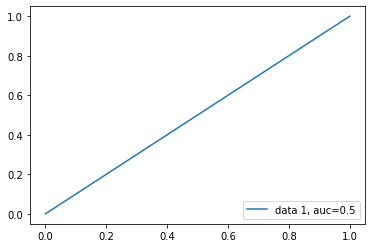

In [121]:
#Graphing the auc curve - the model is not significant since AUC = 0.5
fpr, tpr, _ = roc_curve(y_test_data,predictions)
auc = roc_auc_score(y_test_data, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Section 6.3 - Conclusion 

## Question 3:

3) Can we predict the price using number_of_reviews and review_score_rating?

We used three approaches: 

a) using linear model: y=price, x=number_of_reviews, review_score_rating

R-squared scores are too low to be significant. 

“The r-squared score for the model using only quantitative variables was 0.019743 on 952 values.”

b) using categorical binned variables of number_of_reviews[0,100,200,300,400,500]=[‘None’,’Low’,’Low Med’,’Med’,’High’] and review_score_rating [0,100,200,300,400,500]=[‘None’,’Low’,’Low Med’,’Med’,’High’] on a linear model against y=price. 

R-squared scores are too low or even worse than before. Linear models should be used on contineous variables. 

c) using logistic regression and reframing the question to the following:

Can we predict price "high" or "low" with binned number_of_reviews and review_scores?

The AUC for the model is 0.5 which means we can't use the model, the data may be insufficient to answer the question. 

